# Vertex Count

In this script I will analyze the vertex count in a Cairo Lattice if we increse linearly up from 0 mT to 15 mT with a rate of 0.01875 mT/s (800 s). Then we are Analyzing the output data of Script-1.1.

In [1]:
import fnmatch
import os
import pandas as pd
from os.path import isfile, join
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import matplotlib as mpl

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-1.1"

In [3]:
slope = 15/800

### 1. Read and merge data in a single dataframe

In [4]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, 'ACI_CairoLattice_15mT-800s_l10_exp*.dat'):
        print(file)
        Cairo.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)

ACI_CairoLattice_15mT-800s_l10_exp3.dat
ACI_CairoLattice_15mT-800s_l10_exp7.dat
ACI_CairoLattice_15mT-800s_l10_exp5.dat
ACI_CairoLattice_15mT-800s_l10_exp9.dat
ACI_CairoLattice_15mT-800s_l10_exp4.dat
ACI_CairoLattice_15mT-800s_l10_exp1.dat
ACI_CairoLattice_15mT-800s_l10_exp0.dat
ACI_CairoLattice_15mT-800s_l10_exp8.dat
ACI_CairoLattice_15mT-800s_l10_exp2.dat
ACI_CairoLattice_15mT-800s_l10_exp6.dat


In [5]:
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)

In [6]:
Cairo_exp.index.names = ['Exp', 'frame', 'id']

In [7]:
Cairo_exp.loc[0,0]

,x,y,coordination,charge,dx,dy
id,,,,,,
0,0.000000,36.579081,3,-1,1.732051e+00,1.000000e+00
1,0.000000,56.124881,2,0,8.660254e-01,1.500000e+00
2,903.304603,-115.902042,4,2,1.732051e+00,-1.000000e+00
3,903.312371,-23.184623,4,0,-7.320508e-01,2.732051e+00
4,463.235460,56.124881,2,-2,8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...
1203,175.521284,-92.703963,3,1,2.000000e+00,0.000000e+00
1204,195.067084,-185.407925,3,3,-1.110223e-16,-1.110223e-16
1205,175.521284,-185.407925,3,-1,1.000000e+00,-1.732051e+00


### 2. Now I will filter the vertices near the boundaries

In [8]:
First_frame = Cairo_exp.loc[0,0]

In [9]:
x_min = 95
y_min = -75

width = 700
hight = -700

x_max = x_min+width
y_max = y_min+hight

print(x_min,x_max,y_min,y_max)

95 795 -75 -775


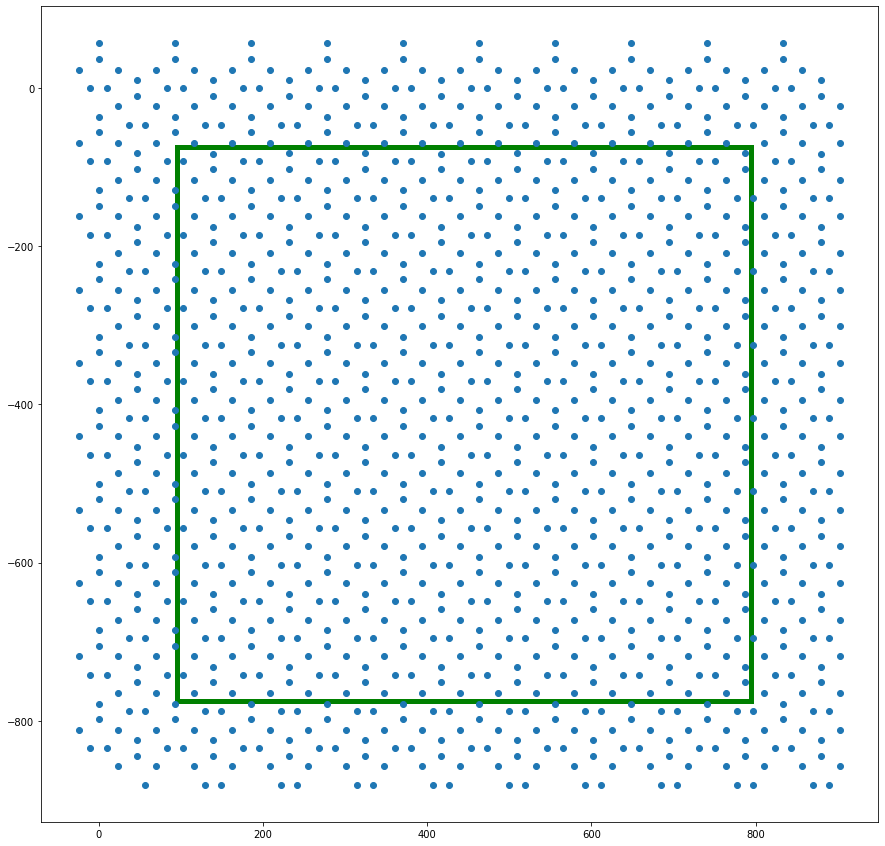

In [10]:
fig =plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)

plt.plot(First_frame.x, First_frame.y , 'o')
ax.add_patch(Rectangle((x_min, y_min),width, hight,fc ='none', ec ='g',lw = 5))

In [11]:
Ca = Cairo_exp.loc[(Cairo_exp['x']<x_max) & (Cairo_exp['x']>x_min)]
Cairo = Ca.loc[(Ca['y']>y_max) & (Ca['y']<y_min)]

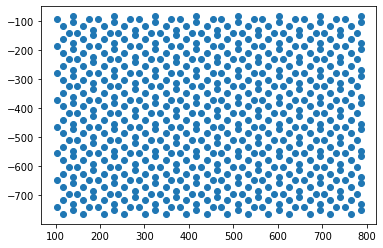

In [12]:
plt.plot(Cairo.loc[0,0].x,Cairo.loc[0,0].y,'o')

### 3. Define and classify vertices

In [13]:
Cairo["type"] = np.NaN

# 4-fold vertices classification

Cairo.loc[Cairo.charge==-4, "type"] = "Q = -4"
Cairo.loc[Cairo.charge==-2, "type"] = "Q = -2"
Cairo.loc[Cairo.charge==+2, "type"] = "Q = +2"
Cairo.loc[Cairo.charge==+4, "type"] = "Q = +4"

zeroq = Cairo.charge==0

dipole_magnitude = np.sqrt(Cairo[zeroq].dx**2+Cairo[zeroq].dy**2)

Cairo.loc[zeroq & (dipole_magnitude<1), "type"] = "Q = 0 GS"
Cairo.loc[zeroq & (dipole_magnitude>2) , "type"] = "Q = 0"

# 3-fold vertices classification

Cairo.loc[Cairo.charge==+1, "type"] = "Q = +1"
Cairo.loc[Cairo.charge==-1, "type"] = "Q = -1"
Cairo.loc[Cairo.charge==+3, "type"] = "Q = +3"
Cairo.loc[Cairo.charge==-3, "type"] = "Q = -3"

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [14]:
Cairo['field'] = (Cairo.index.get_level_values('frame'))*slope 

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
Cairo

x           y  coordination  charge            dx  \
Exp frame id                                                                 
0   0     19    231.617730 -639.160847             3      -3  1.110223e-16   
          26    208.455297 -625.738673             4       2 -1.732051e+00   
          27    301.104471 -301.304559             4      -4 -3.330669e-16   
          30    704.626090 -417.196267             3      -1  2.000000e+00   
          49    426.684814 -139.084379             3      -1 -1.000000e+00   
...                    ...         ...           ...     ...           ...   
9   800   1203  175.521284  -92.703963             3      -1  1.000000e+00   
          1204  195.067084 -185.407925             3       1 -2.000000e+00   
          1205  175.521284 -185.407925             3       3 -5.551115e-17   
          1206  370.588368 -519.644694             3      -1  0.000000e+00   
          1207  380.361268 -556.223776             3       1 -2.000000e+00   

                          dy    type  field  
Exp frame id                                 
0   0     19    0.000000e+00  Q = -3    0.0  
          26    1.000000e+00  Q = +2    0.0  
          27    5.551115e-17  Q = -4    0.0  
          30    1.110223e-16  Q = -1    0.0  
          49    1.732051e+00  Q = -1    0.0  
...                      ...     ...    ...  
9   800   1203 -1.732051e+00  Q = -1   15.0  
          1204 -1.110223e-16  Q = +1   15.0  
          1205  0.000000e+00  Q = +3   15.0  
          1206 -2.000000e+00  Q = -1   15.0  
          1207 -1.110223e-16  Q = +1   15.0  

[5414760 rows x 8 columns]

In [16]:
def count_types(data):
    
    data["mean"] = 0
    cats = ["Q = -4", "Q = -2", "Q = 0 GS", "Q = 0", "Q = +2", "Q = +4","Q = +1","Q = -1","Q = +3","Q = -3" ]
    zeros = pd.DataFrame(np.zeros(len(cats)), columns=["mean"], index = cats)
    zeros.index.name="type"
    counts = zeros+data.groupby("type").count()
    counts[counts.isna()]=0
    return counts

Cairo["mean"]= 0

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


### 3.1 From here we weight the two type of coordinations

In [17]:
count_m = Cairo.loc[:,["type","field","coordination"]].groupby(["Exp","field","coordination"]).apply(count_types)
increase = (count_m/Cairo.groupby(["Exp","field","coordination"]).count()).filter(["mean"])

In [18]:
increase

mean
Exp field coordination type              
0   0.0   3            Q = +1    0.401330
                       Q = +2    0.000000
                       Q = +3    0.113082
                       Q = +4    0.000000
                       Q = -1    0.365854
...                                   ...
9   15.0  4            Q = -2    0.222222
                       Q = -3    0.000000
                       Q = -4    0.017778
                       Q = 0     0.217778
                       Q = 0 GS  0.200000

[160200 rows x 1 columns]

In [19]:
a = increase.query('mean != 0')

In [20]:
a = a.reset_index()

In [21]:
del a['coordination']

In [22]:
a = a.set_index(['Exp', 'field','type'])

In [23]:
def evenly_spaced(series,space):
    series_w_space = pd.concat([
        series.droplevel([0,2]),series.droplevel([0,2]).reindex(space)]
    ).groupby(series.droplevel([0,2]).index.name).first().sort_index()
    
    series_w_space = series_w_space.interpolate(method="index")
    return series_w_space.loc[space]

In [24]:
field = np.linspace(0,15,50)


vert_prop_evenspace_m = a.groupby(["Exp","type"]).apply(evenly_spaced,field)

In [25]:
v_counts_m = vert_prop_evenspace_m.groupby(["field","type"]).mean()
v_counts_m["err"] = vert_prop_evenspace_m.groupby(
    ["field","type"]).std()/np.sqrt(vert_prop_evenspace_m.groupby(["field","type"]).count().values)

In [45]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'



mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "orange", "green", 
                                                    "red", "tomato", "limegreen", 
                                                    "royalblue","gold", "khaki",
                                                    "darkorange"]) 

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "green", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato",
                                                    "red"]) 

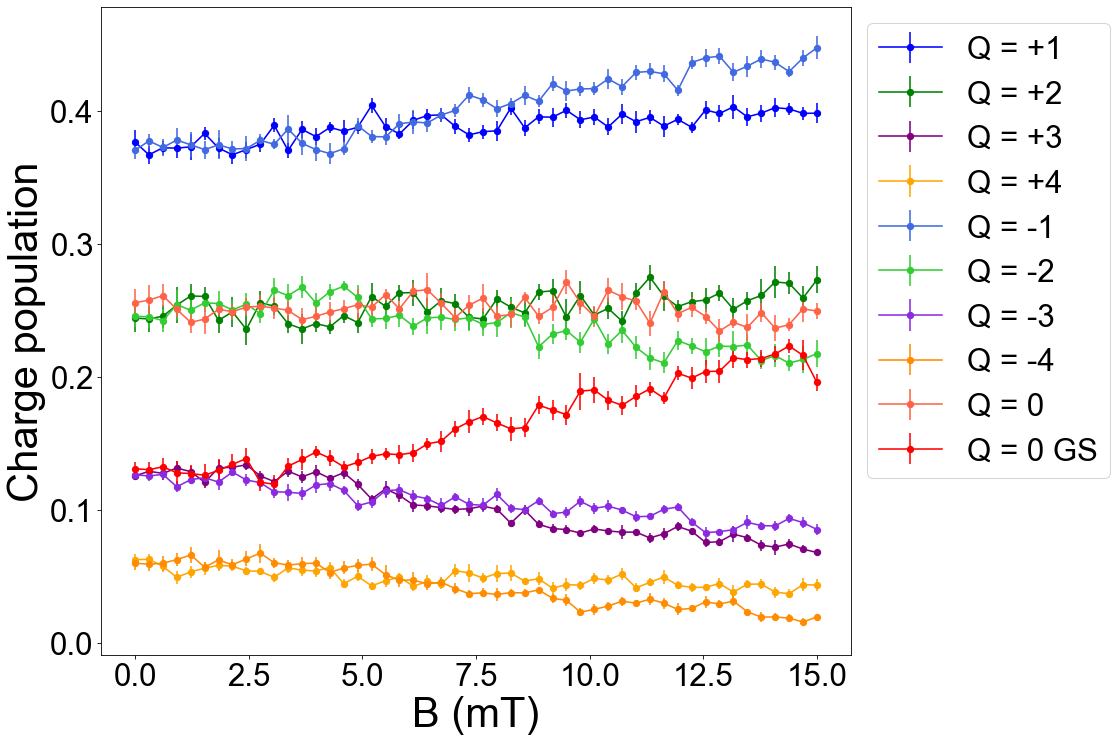

In [51]:
fig, ax1 = plt.subplots(figsize=(15,10))

for typ_m, mtype in v_counts_m .groupby('type'):
    
    plt.errorbar(mtype.index.get_level_values("field"), mtype["mean"],yerr = mtype["err"], fmt ='-o', label = typ_m)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 30, bbox_to_anchor=(1, 1))
ax1.set_xlabel('B (mT)', size = 40)
ax1.set_ylabel('Charge population', size = 40)

plt.tight_layout()